In [27]:
from PIL import Image, ImageOps
import cv2
from pathlib import Path
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

Use solaris conda env

In [8]:
data_dir = Path('data')

In [12]:
base_path = Path('data/colombia_borde_rural/cropped/train')
image_path = base_path/'rotated/clipped'

In [13]:
fnames = [f for f in listdir(image_path) if isfile(join(image_path, f))]

In [14]:
fnames[0]

'7a1e7446.tif'

In [43]:
desired_size = 256
im_pth = image_path/fnames[0]

In [44]:
im = Image.open(im_pth)
old_size = im.size  # old_size[0] is in (width, height) format
old_size


(324, 130)

In [45]:
ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image
new_size

(256, 102)

In [46]:
def mpl_show(new_im):
    plt.imshow(new_im, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [47]:
# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

#new_im.show()

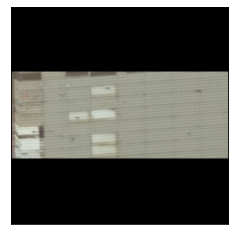

In [48]:
mpl_show(new_im)

#### Resize and pad with ImageOps module

In [49]:
delta_w = desired_size - new_size[0]
delta_h = desired_size - new_size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_im = ImageOps.expand(im, padding)

#new_im.show()

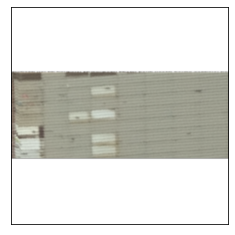

In [50]:
mpl_show(new_im)

### OpenCV

In [21]:
## opencv has copyMakeBorder() method which is handy for making borders
im = cv2.imread(str(im_pth))
old_size = im.shape[:2] # old_size is in (height, width) format
ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
new_size

(102, 256)

In [22]:
# new_size should be in (width, height) format
im = cv2.resize(im, (new_size[1], new_size[0])) 


In [23]:
delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

#### BORDER_REFLECT

Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

In [36]:
color = [0, 0, 0]
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REFLECT,
    value=color)

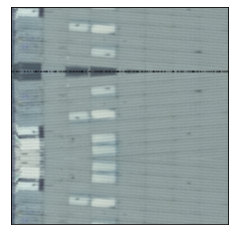

In [37]:
mpl_show(new_im)

#### BORDER_REFLECT_101

Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

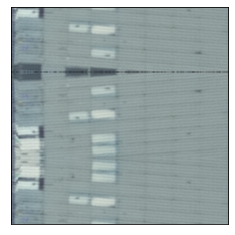

In [38]:
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REFLECT_101,
    value=color)
mpl_show(new_im)

#### BORDER_WRAP

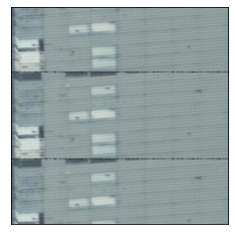

In [39]:
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_WRAP,
    value=color)
mpl_show(new_im)

#### BORDER_CONSTANT

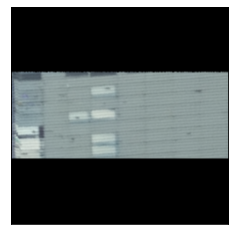

In [40]:
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)
mpl_show(new_im)

#### BORDER_REPLICATE

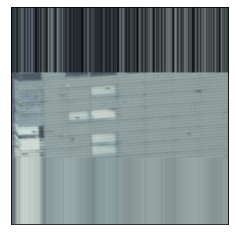

In [41]:
new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE,
    value=color)
mpl_show(new_im)